In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('BOPGSTB.csv', parse_dates=['DATE'], index_col = 'DATE')

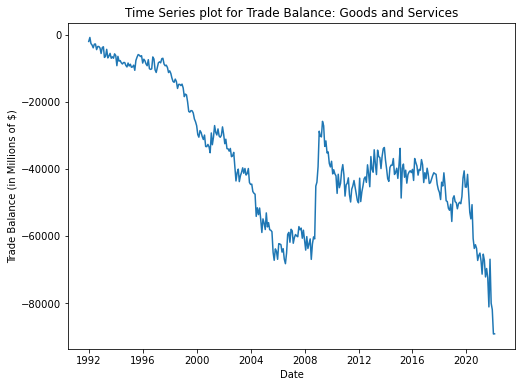

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(df.index, df['BOPGSTB'])
plt.title('Time Series plot for Trade Balance: Goods and Services', fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Trade Balance (in Millions of $)')
plt.show()

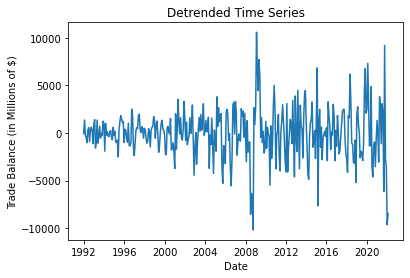

In [4]:
# Subtracting the Trend Component
result_mul = seasonal_decompose(df['BOPGSTB'], model = 'additive', extrapolate_trend = 'freq')
detrended = df.values.reshape(-1) - result_mul.trend.values
plt.plot(df.index, detrended)
plt.title('Detrended Time Series', fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Trade Balance (in Millions of $)')
plt.show()

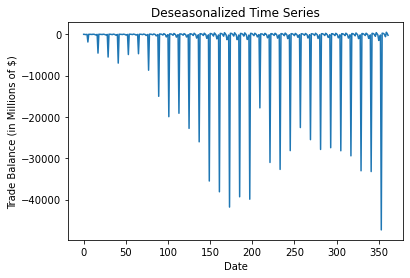

In [5]:
# Subtracting the Seasonal Component
deseasonalized = df.values.reshape(-1) / result_mul.seasonal.values
plt.plot(deseasonalized)
plt.title('Deseasonalized Time Series', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Trade Balance (in Millions of $)')
plt.show()